<a href="https://colab.research.google.com/github/aishwikr/NLP/blob/master/NLP_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import nltk
import re
import numpy as np
from nltk import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import matplotlib.pyplot as plt
from collections import Counter

#nltk.download()
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
def loadingData(fName): 
    data = pd.read_csv(fName, nrows=10)   #reading data
    print("Data Type :", data.dtypes)
    print("Colums of Data :", data.columns)
    print("Index of Data", data.index)
    data = data.iloc[:,1]
    data.head()
    return data
    
data = loadingData("Dataset_1.csv")    

Data Type : id       int64
text    object
dtype: object
Colums of Data : Index(['id', 'text'], dtype='object')
Index of Data RangeIndex(start=0, stop=10, step=1)


In [0]:
def preProcessData(data):
    stopwords_en = list(set(stopwords.words('english')))
    def split(word): 
        return [char for char in word]   
    punchList = split(punctuation)

    #print(stopwords_en)
    #print('Punctuation :', punchList)

    wordTokenList = [word_tokenize(sent) for sent in data]
    lowercasingList = [[word.lower() for word in sentence] for sentence in wordTokenList]
    noStopWordList = [[word for word in sentence if word not in stopwords_en] for sentence in lowercasingList]
    noPunchList = [[re.sub(r'([^\s\w]|_)+', '', word) for word in sentence] for sentence in noStopWordList]
    #noPunchList = [[word for word in sentence if word not in punchList] for sentence in noStopWordList]
    PP_data = [[word for word in sentence if word] for sentence in noPunchList]
    return PP_data

PP_data = preProcessData(data)

In [6]:
import nltk
nltk.download('averaged_perceptron_tagger')
  
def POStagging(PP_data):
    POSTaggList = []
    for sent in PP_data:
        POSTaggList.extend(nltk.pos_tag(sent))    
    return POSTaggList
    
POS_data = POStagging(PP_data)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Total Number of Documents in the data : 10
Sample Document Length [17, 19, 18, 45, 42, 51, 15, 106, 45, 27]
Maximum Number of words in a Document: 106
Minimum Number of words in a Document: 15
Average Number of words in a Document: 38.5
Median Number of words in a Document: 34.5


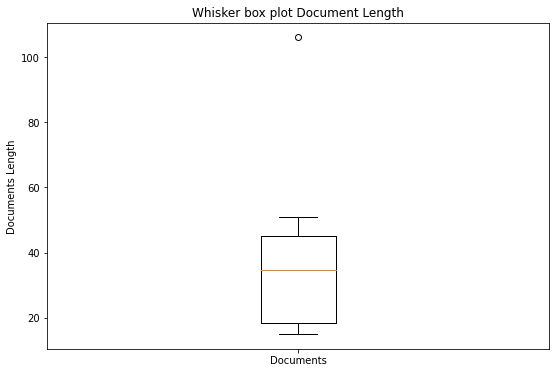

In [7]:
#Data Statistics: Document Level
def sentStatsPlot(PP_data):
    sentenceLenList = [] 
    print("Total Number of Documents in the data :", len(PP_data)) 
    for sent in PP_data:
        sentenceLenList.append(len(sent))

    print("Sample Document Length", sentenceLenList[:10])    
    print("Maximum Number of words in a Document:", max(sentenceLenList)) 
    print("Minimum Number of words in a Document:", min(sentenceLenList)) 
    print("Average Number of words in a Document:", sum(sentenceLenList)/len(PP_data)) 
    print("Median Number of words in a Document:", np.median(sentenceLenList))
    
    #Whisker-box plot
    data_to_plot = [np.array(sentenceLenList)]
    fig = plt.figure(1, figsize=(9, 6))

    ax = fig.add_subplot(111)
    bp = ax.boxplot(data_to_plot)

    ax.set_xticklabels(['Documents', ])
    ax.set_title('Whisker box plot Document Length')
    ax.set_ylabel('Documents Length')
    return

sentStatsPlot(PP_data)

Sample Word List : ['p', 'backprop', 'mean', 've', 'googled', 's', 'showing', 'backpropagation', 'p', 'p']
Total Number of words : 385
Total Number Unique of words : 251
Most Frequent 30 words : [('p', 44), ('href', 7), ('a', 7), ('ai', 6), ('intelligence', 5), ('https', 5), ('rel', 4), ('artificial', 4), ('two', 4), ('test', 4), ('help', 3), ('network', 3), ('know', 3), ('system', 3), ('nofollow', 3), ('intelligent', 3), ('registration', 3), ('use', 3), ('types', 3), ('backprop', 2), ('mean', 2), ('ve', 2), ('s', 2), ('backpropagation', 2), ('make', 2), ('need', 2), ('single', 2), ('number', 2), ('m', 2), ('could', 2)]


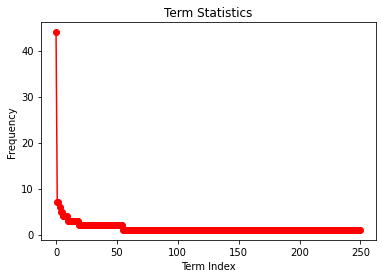

In [8]:
def wordStatsAndPlot(PP_data):
    wordList = []
    for sent in PP_data:
        for word in sent:
            wordList.append(word)
    print ("Sample Word List :", wordList[:10])
    print("=================================================")
    counter = Counter(wordList)
    print("Total Number of words :", len(wordList))
    print("Total Number Unique of words :", len(list(set(wordList))))
    print ("Most Frequent 30 words :", counter.most_common(30))
    
    wordPlotList, wordIndexList, freqList = [], [], [] 
    count = 0
    for word, freq in counter.most_common(len(set(wordList))):
        wordPlotList.append(word)
        wordIndexList.append(count)
        freqList.append(freq)
        count += 1   
        
    plt.title('Term Statistics')
    plt.xlabel('Term Index')
    plt.ylabel('Frequency')
    plt.plot(wordIndexList, freqList, 'ro-')
    #plt.gca().legend(('Train_Avg_MSE','Test_Avg_MSE'))
    #plt.savefig('lembdaVsAvg_MSE_part-'+str(parti)+'.png')
    plt.show()
    
wordStatsAndPlot(PP_data)    

Total Number of POS tagg : 385
Total Number of unique POS tagg : 19
Most Frequent 30 POS tag : [('NN', 151), ('JJ', 82), ('NNS', 36), ('VBP', 20), ('VBG', 19), ('RB', 17), ('VBN', 11), ('VBD', 9), ('VB', 8), ('DT', 7), ('IN', 5), ('CD', 5), ('VBZ', 4), ('MD', 3), ('JJR', 3), ('JJS', 2), ('PRP', 1), ('RBR', 1), ('WRB', 1)]


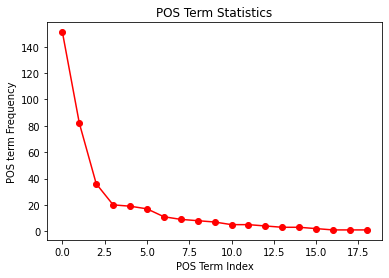

In [9]:
def POSStatsAndPlot(POS_data):  
    POSTaggList = []
    for _, POS in POS_data:
        POSTaggList.append(POS)
       
    print("Total Number of POS tagg :", len(POSTaggList))
    print("Total Number of unique POS tagg :", len(set(POSTaggList)))
    POScounter = Counter(POSTaggList) 
    print ("Most Frequent 30 POS tag :", POScounter.most_common(30))
    
    POSPlotList, POSIndexList, POSfreqList = [], [], [] 
    count = 0
    for word, freq in POScounter.most_common(len(set(POSTaggList))):
        POSPlotList.append(word)
        POSIndexList.append(count)
        POSfreqList.append(freq)
        count += 1     
        
    plt.title('POS Term Statistics')
    plt.xlabel('POS Term Index')
    plt.ylabel('POS term Frequency')
    plt.plot(POSIndexList, POSfreqList, 'ro-')
    #plt.gca().legend(('Train_Avg_MSE','Test_Avg_MSE'))
    #plt.savefig('lembdaVsAvg_MSE_part-'+str(parti)+'.png')
    plt.show()
    
POSStatsAndPlot(POS_data)